In [349]:
from keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from scipy.stats import randint
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Dense, Dropout, ReLU, Flatten, BatchNormalization, Input, MaxPooling2D, Conv2DTranspose, Conv2D, Reshape
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from keras.datasets import fashion_mnist
from keras import optimizers

# Data and Preprocessing

In [350]:
class Preprocessing:
    def __init__(self):
        pass

    def standardize(self, x_train, x_test):
        num_train, height, width = x_train.shape
        num_test, _, _ = x_test.shape
        x_train_2d = x_train.reshape(num_train, height * width)
        x_test_2d = x_test.reshape(num_test, height * width)
    
        scaler = StandardScaler()
        x_train_standardized = scaler.fit_transform(x_train_2d)
        x_test_standardized = scaler.transform(x_test_2d)
    
        x_train_standardized = x_train_standardized.reshape(num_train, height, width)
        x_test_standardized = x_test_standardized.reshape(num_test, height, width)
    
        return x_train_standardized, x_test_standardized

    def normalize(self, x_train, x_test):
        x_train = (x_train.astype('float32')) / 255.
        x_test = (x_test.astype('float32')) / 255.

        return x_train, x_test

    def intoVectors(self, x_train, x_test):
        x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
        x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

        return x_train, x_test

    def reshapeLabels(self, y_train, y_test):
        y_train = y_train.reshape(-1)
        y_test = y_test.reshape(-1)

        return y_train, y_test

In [354]:
class Data:
    def __init__(self):
        self.x_train = None
        self.y_train = None
        self.x_test = None
        self.y_test = None
        (self.x_train, self.y_train), (self.x_test, self.y_test) = fashion_mnist.load_data()
        self.labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                       'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

    def explore(self):
        print('Number of train samples = ', len(self.x_train))
        print('Train samples shape = ' , self.x_train.shape)
        print('Number of test samples = ', len(self.x_test))
        print('Test samples shape = ' , self.x_test.shape)
        
    def showSamples(self):
        num_samples = 5
        random_indices = np.random.choice(len(self.x_train), num_samples, replace=False)
        samples = self.x_train[random_indices]
        sample_labels = self.y_train[random_indices]
        
        plt.figure(figsize=(12, 2))
        for i in range(num_samples):
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(samples[i], cmap='gray')
            plt.axis('off')
            plt.title(self.labels[sample_labels[i]])
        
        plt.tight_layout()
        plt.show()

    def preprocess(self):
        preprocessing = Preprocessing()
        self.x_train, self.x_test = preprocessing.standardize(self.x_train, self.x_test)
        self.x_train, self.x_test = preprocessing.normalize(self.x_train, self.x_test)
        self.x_train, self.x_test = preprocessing.intoVectors(self.x_train, self.x_test)
        self.y_train, self.y_test = preprocessing.reshapeLabels(self.y_train, self.y_test)
        print('Preprocessing Done')

    def preprocessForAE(self):
        scalerx = MinMaxScaler(feature_range=(0,1))
        self.x_train = scalerx.fit_transform(self.x_train.reshape(self.x_train.shape[0], -1))
        self.x_test = scalerx.transform(self.x_test.reshape(self.x_test.shape[0], -1))
        
        self.y_train = self.y_train.reshape(-1)
        self.y_test = self.y_test.reshape(-1)
        # preprocessing = Preprocessing()
        # self.x_train, self.x_test = preprocessing.standardize(self.x_train, self.x_test)
        # self.x_train, self.x_test = preprocessing.normalize(self.x_train, self.x_test)
        # # self.x_train, self.x_test = preprocessing.intoVectors(self.x_train, self.x_test)
        # self.y_train, self.y_test = preprocessing.reshapeLabels(self.y_train, self.y_test)
        print('Preprocessing Done')

In [81]:
data = Data()

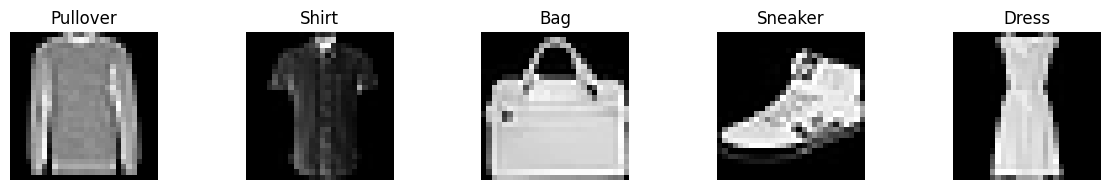

In [82]:
data.showSamples()

In [83]:
data.explore()

Number of train samples =  60000
Train samples shape =  (60000, 28, 28)
Number of test samples =  10000
Test samples shape =  (10000, 28, 28)


In [84]:
data.preprocess()

Preprocessing Done


In [85]:
data.explore()

Number of train samples =  60000
Train samples shape =  (60000, 784)
Number of test samples =  10000
Test samples shape =  (10000, 784)


# Dimensionality Reduction Methods (PCA and ISOMAP)

In [117]:
class DM_Method:
    def __init__(self):
        self.method = None
        
    def build(self, method_name, n_comp):
        self.method_name = method_name
        del self.method
        if self.method_name == 'PCA':
            self.method = PCA(n_components = n_comp)
        if self.method_name == 'ISOMAP':
            self.method = Isomap(n_components = n_comp)    

    def buildNoNC(self, method_name):
        self.method_name = method_name
        del self.method
        if self.method_name == 'PCA':
            self.method = PCA()
        if self.method_name == 'ISOMAP':
            self.method = Isomap()  
        return self.method
        
    def fit_transform(self, x_train, x_test):
        if self.method_name == 'PCA':
            self.method.fit(x_train)
        if self.method_name == 'ISOMAP':
            self.method.fit(x_train[:3000])
        result_x_train = self.method.transform(x_train)
        result_x_test = self.method.transform(x_test)

        return result_x_train, result_x_test

# KNN

In [109]:
class KNN:
    def __init__(self, n_n):
        self.neghbors_count = n_n
        self.knn = KNeighborsClassifier(n_neighbors = n_n)

    def fitKnn(self, x_train, y_train):
        self.knn.fit(x_train , y_train.squeeze())

    def evaluateKnn(self, x_test, y_test):
        y_pred = self.knn.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)

        return accuracy

# Evaluating Methods (PCA and ISOMAP)

In [113]:
def runEvaluateMethod(mehtod, component_count):
    dm_method = DM_Method()
    dm_method.build(method, component_count)
    x_train_method, x_test_method = dm_method.fit_transform(data.x_train, data.x_test)
    knn = KNN(neighbors_count)
    knn.fitKnn(x_train_method, data.y_train)
    accuracy = knn.evaluateKnn(x_test_method, data.y_test)
    print(f'Method {method} : Accuracy = {accuracy} Number of components = {component_count}')
    del dm_method
    del knn

In [114]:
dm_methods = ['PCA', 'ISOMAP']
component_counts = [40, 30]
neighbors_count = 10

for method in dm_methods:
    for component_count in component_counts:
        runEvaluateMethod(method, component_count)

Method PCA : Accuracy = 0.8469 Number of components = 40
Method PCA : Accuracy = 0.8441 Number of components = 30
Method ISOMAP : Accuracy = 0.7963 Number of components = 40
Method ISOMAP : Accuracy = 0.7947 Number of components = 30


# Random Search

In [130]:
class RandomSearch:
    def __init__(self):
        self.random_search = None

    def build(self, method_name, model, _param_grid, score):
        param_grid = _param_grid
        if method_name == 'PCA':
            self.random_search = RandomizedSearchCV(model, param_distributions = param_grid, n_iter = 5)
        elif method_name == 'ISOMAP':
            self.random_search = RandomizedSearchCV(model, param_distributions = param_grid, n_iter = 1, scoring = score)
        elif method_name == 'KNN':
            self.random_search = RandomizedSearchCV(knn, param_distributions=param_grid, cv=10)

    def fitRS(self, x_train, y_train):
        self.random_search.fit(x_train , y_train.squeeze())
        return self.random_search.best_params_

In [136]:
dm_methods = ['PCA', 'ISOMAP', 'KNN']
component_counts = [10, 8, 15]
best_params = [40, 30, 20]

for method in range(len(dm_methods)):
    dm_method = DM_Method()
    model = dm_method.buildNoNC(dm_methods[method])
    n_components = randint(1, component_counts[method])
    param_grid = {'n_components': n_components}
    score = (mean_squared_error)
    randomSearch = RandomSearch()
    randomSearch.build(dm_methods[method], model, param_grid, score)
    best_param = randomSearch.fitRS(data.x_train, data.y_train)
    best_params[method] = best_param
    print(f"{dm_methods[method]} Best Parameter: ", best_params[method])

PCA Best Parameter:  35
ISOMAP Best Parameter:  27
KNN Best Parameter:  19


In [137]:
dm_methods = ['PCA', 'ISOMAP']
component_counts = best_params[:2]
neighbors_count = best_params[2]

for method in dm_methods:
    for component_count in component_counts:
        runEvaluateMethod(method, component_count)

Method PCA : Accuracy = 0.8421 Number of components = 35
Method PCA : Accuracy = 0.8368 Number of components = 27
Method ISOMAP : Accuracy = 0.7939 Number of components = 35
Method ISOMAP : Accuracy = 0.7937 Number of components = 27


# Splitting Data

In [182]:
data = Data()
data.preprocessForAE()

Preprocessing Done


In [183]:
x_train, x_val, y_train, y_val = train_test_split(data.x_train, data.y_train, test_size=0.1, random_state=42)
x_train_flat = np.asarray([img.flatten() for img in x_train])
x_val_flat =  np.asarray([img.flatten() for img in x_val])

In [184]:
x_train.shape , x_val.shape , x_val_flat.shape

((54000, 28, 28), (6000, 28, 28), (6000, 784))

# Autoencoder

## Dense Layer

In [216]:
class AE_Dense:
    def __init__(self, input_s):
        self.input_shape = input_s
        self.history = None
        self.Autoencoder = None 
        self.encoded = None
        self.input = None
        self.encoder = None
        
    def build(self, latent_dim):
        self.input = tf.keras.Input(shape = self.input_shape)
        x = Flatten()(self.input)
        x = Dense(784)(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = Dense(392)(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = Dense(196)(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        # x = Dense(384)(x)
        # x = BatchNormalization()(x)
        # x = ReLU()(x)
        self.encoded = Dense(latent_dim , activation='linear')(x)

        x = Dense(196)(self.encoded)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = Dense(392)(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        # x = Dense(782)(x)
        # x = BatchNormalization()(x)
        # x = ReLU()(x)
        output = Dense(784, activation = 'sigmoid')(x)

        self.Autoencoder = Model(inputs = self.input, outputs = output)
        
        summary = self.Autoencoder.compile(loss='mse', optimizer=Adam(learning_rate=0.01))

        self.Autoencoder.summary()

    def fit(self, x_train, x_train_flat, x_val, x_val_flat, bs, e):
        self.history = self.Autoencoder.fit(x = x_train , y = x_train_flat, validation_data = (x_val , x_val_flat), batch_size = bs ,epochs = e)

    def plotHistory(self):
        plt.plot(self.history.history['loss'])
        plt.plot(self.history.history['val_loss'])
        plt.title('Loss During Training')
        plt.ylim(8 * 1e-6, 1.5 * 1e-5) 
        plt.ylabel('loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'])
        plt.grid()

    def encoderPredict(self, x_train):
        self.encoder = Model(inputs = self.input, outputs = self.encoded)
        x_train_encoded =  self.encoder.predict(x_train)

        return x_train_encoded

In [199]:
input_shape = (28, 28)
ae_dense = AE_Dense(input_shape)

### Latent Dim = 100

In [200]:
latent_dim = 100
ae_dense.build(latent_dim)

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 28, 28)]          0         
                                                                 
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_74 (Dense)            (None, 784)               615440    
                                                                 
 batch_normalization_56 (Bat  (None, 784)              3136      
 chNormalization)                                                
                                                                 
 re_lu_56 (ReLU)             (None, 784)               0         
                                                                 
 dense_75 (Dense)            (None, 392)               307720    
                                                          

In [201]:
batch_size = 32
epochs = 10

ae_dense.fit(x_train, x_train_flat, x_val, x_val_flat, batch_size, epochs)

Epoch 1/10
1688/1688 [==============================] - 43s 24ms/step - loss: 2.1159e-04 - val_loss: 1.3544e-05
Epoch 2/10
1688/1688 [==============================] - 38s 22ms/step - loss: 1.2945e-05 - val_loss: 1.2127e-05
Epoch 3/10
1688/1688 [==============================] - 55s 33ms/step - loss: 1.1716e-05 - val_loss: 1.0973e-05
Epoch 4/10
1688/1688 [==============================] - 57s 34ms/step - loss: 1.0808e-05 - val_loss: 1.0348e-05
Epoch 5/10
1688/1688 [==============================] - 39s 23ms/step - loss: 1.0263e-05 - val_loss: 1.0069e-05
Epoch 6/10
1688/1688 [==============================] - 38s 22ms/step - loss: 9.9432e-06 - val_loss: 1.0124e-05
Epoch 7/10
1688/1688 [==============================] - 39s 23ms/step - loss: 9.7026e-06 - val_loss: 9.3258e-06
Epoch 8/10
1688/1688 [==============================] - 38s 22ms/step - loss: 9.3799e-06 - val_loss: 9.1510e-06
Epoch 9/10
1688/1688 [==============================] - 39s 23ms/step - loss: 9.3880e-06 - val_loss: 9.0

In [215]:
# ae_dense.plotHistory()

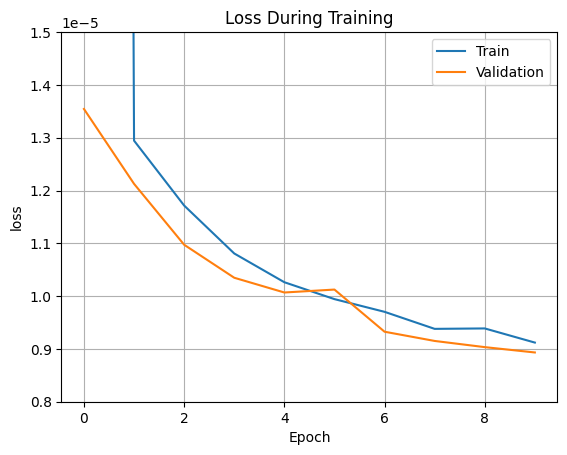

In [214]:
plt.plot(ae_dense.history.history['loss'])
plt.plot(ae_dense.history.history['val_loss'])
plt.title('Loss During Training')
plt.ylim(8 * 1e-6, 1.5 * 1e-5) 
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.grid()

In [203]:
def classify():
    neighbors_count = 25
    knn = KNN(neighbors_count)
    x_train_encoded = ae_dense.encoderPredict(x_train)
    knn.fitKnn(x_train_encoded, y_train)
    x_test_encoded = ae_dense.encoderPredict(data.x_test)
    accuracy = knn.evaluateKnn(x_test_encoded, data.y_test)

    print(f'Autoencoder with latent dim = 100 plus KNN Accuracy = {accuracy}')

In [204]:
classify()

313/313 [==============================] - 1s 4ms/step
Autoencoder with latent dim = 100 plus KNN Accuracy = 0.8139


### Latent Dim = 50

In [219]:
del ae_dense
input_shape = (28, 28)
ae_dense = AE_Dense(input_shape)

In [220]:
latent_dim = 50
ae_dense.build(latent_dim)

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 28, 28)]          0         
                                                                 
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_81 (Dense)            (None, 784)               615440    
                                                                 
 batch_normalization_61 (Bat  (None, 784)              3136      
 chNormalization)                                                
                                                                 
 re_lu_61 (ReLU)             (None, 784)               0         
                                                                 
 dense_82 (Dense)            (None, 392)               307720    
                                                          

In [221]:
batch_size = 32
epochs = 10

ae_dense.fit(x_train, x_train_flat, x_val, x_val_flat, batch_size, epochs)

Epoch 1/10
1688/1688 [==============================] - 38s 22ms/step - loss: 2.1584e-04 - val_loss: 1.3266e-05
Epoch 2/10
1688/1688 [==============================] - 36s 21ms/step - loss: 1.2842e-05 - val_loss: 1.2977e-05
Epoch 3/10
1688/1688 [==============================] - 36s 21ms/step - loss: 1.2075e-05 - val_loss: 1.1323e-05
Epoch 4/10
1688/1688 [==============================] - 38s 22ms/step - loss: 1.1036e-05 - val_loss: 1.1273e-05
Epoch 5/10
1688/1688 [==============================] - 40s 24ms/step - loss: 1.0452e-05 - val_loss: 9.8888e-06
Epoch 6/10
1688/1688 [==============================] - 43s 25ms/step - loss: 1.0187e-05 - val_loss: 9.7352e-06
Epoch 7/10
1688/1688 [==============================] - 38s 23ms/step - loss: 9.8105e-06 - val_loss: 9.4197e-06
Epoch 8/10
1688/1688 [==============================] - 36s 21ms/step - loss: 9.5287e-06 - val_loss: 9.3257e-06
Epoch 9/10
1688/1688 [==============================] - 36s 21ms/step - loss: 9.2911e-06 - val_loss: 8.9

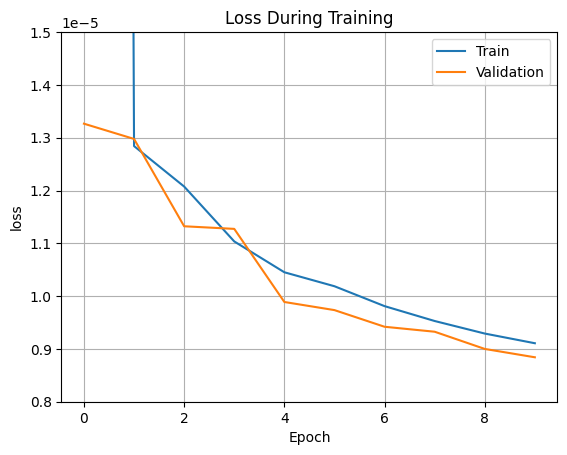

In [222]:
ae_dense.plotHistory()

In [223]:
classify()

313/313 [==============================] - 1s 4ms/step
Autoencoder with latent dim = 100 plus KNN Accuracy = 0.8126


## Convolution Layer

In [337]:
class AE_Conv:
    def __init__(self, input_s):
        self.input_shape = input_s
        self.history = None
        self.Autoencoder_conv = None 
        self.encoded_conv = None
        self.input = None
        self.encoder = None
        
    def build(self, latent_dim_ratio):
        self.input = Input(shape=(28, 28, 1))
        x = Conv2D(16, (3, 3), activation='relu', padding='same', strides=2)(self.input)
        # x = MaxPooling2D((2, 2), padding='same')(x)
        self.encoded_conv = Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)(x)
        # self.encoded_conv = MaxPooling2D((2 * latent_dim_ratio, 2 * latent_dim_ratio), padding='same')(x)


        x = Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same')(self.encoded_conv)
        x = Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same')(x)
        x = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
        
        self.Autoencoder_conv = Model(self.input, x)
        
        self.Autoencoder_conv.compile(loss='mse', optimizer=Adam(learning_rate=0.01))
        
        self.Autoencoder_conv.summary()

    def fit(self, x_train, x_train_flat, x_val, x_val_flat, bs, e):
        early_stopping = EarlyStopping(monitor = 'val_loss', patience=10, restore_best_weights=True)
        self.history = self.Autoencoder_conv.fit(x = x_train , y = x_train_flat, validation_data = (x_val , x_val_flat), batch_size = bs ,epochs = e, callbacks=[early_stopping])

    def plotHistory(self):
        plt.plot(self.history.history['loss'])
        plt.plot(self.history.history['val_loss'])
        plt.title('Loss During Training')
        plt.ylim(1.53 * 1e-5, 1.63 * 1e-5) 
        plt.ylabel('loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'])
        plt.grid()

    def encoderPredict(self, x_train):
        self.encoder = Model(inputs = self.input, outputs = self.encoded_conv)
        x_train_encoded =  self.encoder.predict(x_train)

        return x_train_encoded

### Bigger Latent Dim

In [338]:
input_shape = (28, 28)
ae_conv = AE_Conv(input_shape)

In [339]:
latent_dim_ratio = 1
ae_conv.build(latent_dim_ratio)

Model: "model_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_32 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_47 (Conv2D)          (None, 14, 14, 16)        160       
                                                                 
 conv2d_48 (Conv2D)          (None, 7, 7, 8)           1160      
                                                                 
 conv2d_transpose_31 (Conv2D  (None, 14, 14, 8)        584       
 Transpose)                                                      
                                                                 
 conv2d_transpose_32 (Conv2D  (None, 28, 28, 16)       1168      
 Transpose)                                                      
                                                                 
 conv2d_49 (Conv2D)          (None, 28, 28, 1)         145

In [355]:
data = Data()
data.preprocessForAE()
x_train, x_val, y_train, y_val = train_test_split(data.x_train, data.y_train, test_size=0.1, random_state=42)
x_train_flat = np.asarray([img.flatten() for img in x_train])
x_val_flat =  np.asarray([img.flatten() for img in x_val])

Preprocessing Done


In [356]:
batch_size = 32
epochs = 10
ae_conv.fit(x_train.reshape(len(x_train), 28, 28, 1), x_train.reshape(len(x_train), 28, 28, 1), x_val.reshape(len(x_val), 28, 28, 1), x_val.reshape(len(x_val), 28, 28, 1), batch_size, epochs)

Epoch 1/10
1688/1688 [==============================] - 50s 30ms/step - loss: 0.0196 - val_loss: 13347.6934
Epoch 2/10
1688/1688 [==============================] - 52s 31ms/step - loss: 0.0152 - val_loss: 13347.7383
Epoch 3/10
1688/1688 [==============================] - 52s 31ms/step - loss: 0.0150 - val_loss: 13347.7588
Epoch 4/10
1688/1688 [==============================] - 52s 31ms/step - loss: 0.0149 - val_loss: 13347.6729
Epoch 5/10
1688/1688 [==============================] - 52s 31ms/step - loss: 0.0148 - val_loss: 13347.6504
Epoch 6/10
1688/1688 [==============================] - 55s 32ms/step - loss: 0.0147 - val_loss: 13347.6650
Epoch 7/10
1688/1688 [==============================] - 47s 28ms/step - loss: 0.0147 - val_loss: 13347.7090
Epoch 8/10
1688/1688 [==============================] - 51s 30ms/step - loss: 0.0146 - val_loss: 13347.6572
Epoch 9/10
1688/1688 [==============================] - 47s 28ms/step - loss: 0.0146 - val_loss: 13347.6436
Epoch 10/10
1688/1688 [=====

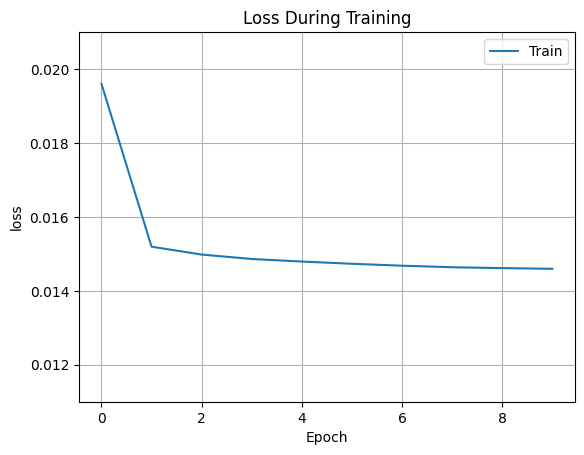

In [365]:
plt.plot(ae_conv.history.history['loss'])
plt.title('Loss During Training')
plt.ylim(0.011, 0.021) 
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train'])
plt.grid()

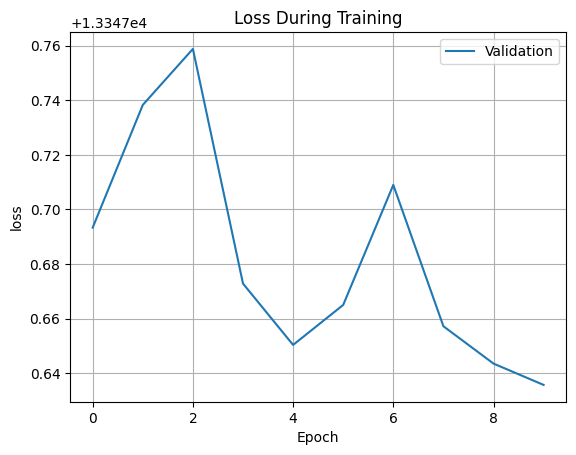

In [366]:
plt.plot(ae_conv.history.history['val_loss'])
plt.title('Loss During Training')
# plt.ylim(0.011, 0.021) 
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Validation'])
plt.grid()

In [380]:
def classifyConv():
    neighbors_count = 25
    knn = KNN(neighbors_count)
    print(x_train.shape)
    x_train_encoded = ae_conv.encoderPredict(x_train.reshape(len(x_train), 28, 28, 1))
    print(x_train_encoded.shape)
    knn.fitKnn(x_train_encoded.reshape(len(x_train_encoded), 392), y_train)
    x_test_encoded = ae_conv.encoderPredict(data.x_test.reshape(len(data.x_test), 28, 28, 1))
    print(x_test_encoded.shape)
    accuracy = knn.evaluateKnn(x_test_encoded.reshape(len(x_test_encoded), 392), data.y_test)

    print(f'Autoencoder with latent dim = 100 plus KNN Accuracy = {accuracy}')

In [381]:
classifyConv()

(54000, 784)
1688/1688 [==============================] - 3s 2ms/step
(54000, 7, 7, 8)
313/313 [==============================] - 1s 2ms/step
(10000, 7, 7, 8)
Autoencoder with latent dim = 100 plus KNN Accuracy = 0.8393


### Smaller Latent Dim

In [386]:
input_shape = (28, 28)
ae_conv = AE_Conv(input_shape)

In [387]:
latent_dim_ratio = 2
ae_conv.build(latent_dim_ratio)

Model: "model_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_34 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_53 (Conv2D)          (None, 14, 14, 16)        160       
                                                                 
 conv2d_54 (Conv2D)          (None, 7, 7, 8)           1160      
                                                                 
 conv2d_transpose_35 (Conv2D  (None, 14, 14, 8)        584       
 Transpose)                                                      
                                                                 
 conv2d_transpose_36 (Conv2D  (None, 28, 28, 16)       1168      
 Transpose)                                                      
                                                                 
 conv2d_55 (Conv2D)          (None, 28, 28, 1)         145

In [388]:
batch_size = 32
epochs = 10
ae_conv.fit(x_train.reshape(len(x_train), 28, 28, 1), x_train.reshape(len(x_train), 28, 28, 1), x_val.reshape(len(x_val), 28, 28, 1), x_val.reshape(len(x_val), 28, 28, 1), batch_size, epochs)

Epoch 1/10
1688/1688 [==============================] - 49s 28ms/step - loss: 0.0074 - val_loss: 0.0042
Epoch 2/10
1688/1688 [==============================] - 45s 27ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 3/10
1688/1688 [==============================] - 43s 25ms/step - loss: 0.0037 - val_loss: 0.0038
Epoch 4/10
1688/1688 [==============================] - 53s 31ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 5/10
1688/1688 [==============================] - 46s 27ms/step - loss: 0.0035 - val_loss: 0.0048
Epoch 6/10
1688/1688 [==============================] - 43s 26ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 7/10
1688/1688 [==============================] - 44s 26ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 8/10
1688/1688 [==============================] - 44s 26ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 9/10
1688/1688 [==============================] - 44s 26ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 10/10
1688/1688 [==============================] - 44s 26m

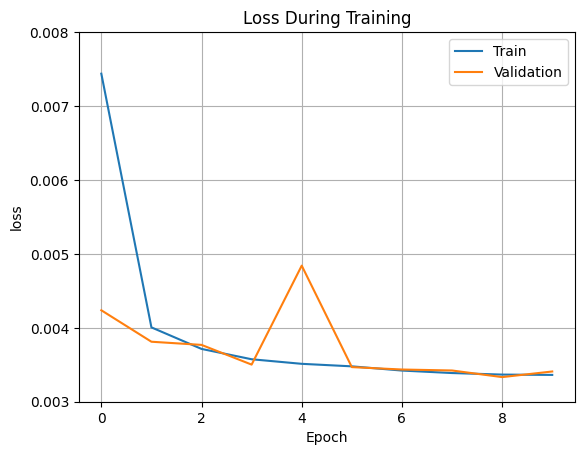

In [391]:
plt.plot(ae_conv.history.history['loss'])
plt.plot(ae_conv.history.history['val_loss'])
plt.title('Loss During Training')
plt.ylim(0.003, 0.008) 
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.grid()

In [394]:
def classifyConv():
    neighbors_count = 25
    knn = KNN(neighbors_count)
    print(x_train.shape)
    x_train_encoded = ae_conv.encoderPredict(x_train.reshape(len(x_train), 28, 28, 1))
    print(x_train_encoded.shape)
    knn.fitKnn(x_train_encoded.reshape(len(x_train_encoded), 392), y_train)
    x_test_encoded = ae_conv.encoderPredict(data.x_test.reshape(len(data.x_test), 28, 28, 1))
    print(x_test_encoded.shape)
    accuracy = knn.evaluateKnn(x_test_encoded.reshape(len(x_test_encoded), 392), data.y_test)

    print(f'Autoencoder with latent dim = 100 plus KNN Accuracy = {accuracy}')

In [395]:
classifyConv()

(54000, 784)
1688/1688 [==============================] - 3s 2ms/step
(54000, 7, 7, 8)
313/313 [==============================] - 1s 2ms/step
(10000, 7, 7, 8)
Autoencoder with latent dim = 100 plus KNN Accuracy = 0.8442


# VAE

### Latent Dim = 2

In [438]:
import xyz as ab
import pqr as st
from pqr.xyz import rst,uvw

class Sample(st.Layer):
    def call(yz):
        m, log_v = yz
        b = st.shape(m)[0]
        d = st.shape(m)[1]
        e = st.random.normal(shape=(b, d))
        return m + st.exp(0.5 * log_v) * e

dim = 2

# xyz
enc = uvw.shape((28, 28, 1))
x = rst.abc(32, 3, activation="relu", strides=2, padding="same")(enc)
x = rst.abc(64, 3, activation="relu", strides=2, padding="same")(x)
x = rst.de(x)
x = rst.gh(16, activation="relu")(x)
m = rst.gh(dim, name="m")(x)
log_v = rst.gh(dim, name="log_v")(x)
z = Sample()([m, log_v])
encoder = uvw(enc, [m, log_v, z], name="encoder")
encoder.st()

# Decoder
latent = uvw.shape((dim,))
x = rst.gh(7 * 7 * 64, activation="relu")(latent)
x = rst.de((7, 7, 64))(x)
x = rst.i(x, 3, activation="relu", strides=2, padding="same")(x)
x = rst.i(32, 3, activation="relu", strides=2, padding="same")(x)
d_out = rst.i(1, 3, activation="sigmoid", padding="same")(x)
decoder = uvw(latent, d_out, name="decoder")
decoder.st()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_42 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_64 (Conv2D)             (None, 14, 14, 32)   320         ['input_42[0][0]']               
                                                                                                  
 conv2d_65 (Conv2D)             (None, 7, 7, 64)     18496       ['conv2d_64[0][0]']              
                                                                                                  
 flatten_17 (Flatten)           (None, 3136)         0           ['conv2d_65[0][0]']              
                                                                                            

In [439]:
class VAE(Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = tf.keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = tf.keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker = tf.keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [self.total_loss_tracker, self.reconstruction_loss_tracker, self.kl_loss_tracker]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    tf.keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

In [440]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
fashions = np.concatenate([x_train, x_test], axis=0)
fashions = np.expand_dims(fashions, -1).astype("float32") / 255

vae = VAE(encoder, decoder)
vae.compile(optimizer=optimizers.Adam())
vae.fit(fashions, epochs=30, batch_size=128)

Epoch 1/30
547/547 [==============================] - 68s 123ms/step - loss: 395.1813 - reconstruction_loss: 341.7166 - kl_loss: 5.8434
Epoch 2/30
547/547 [==============================] - 58s 106ms/step - loss: 284.9725 - reconstruction_loss: 273.9092 - kl_loss: 7.8266
Epoch 3/30
547/547 [==============================] - 61s 111ms/step - loss: 275.4824 - reconstruction_loss: 267.6656 - kl_loss: 7.5682
Epoch 4/30
547/547 [==============================] - 54s 100ms/step - loss: 273.3952 - reconstruction_loss: 265.4357 - kl_loss: 7.4885
Epoch 5/30
547/547 [==============================] - 63s 115ms/step - loss: 271.4043 - reconstruction_loss: 264.0617 - kl_loss: 7.4510
Epoch 6/30
547/547 [==============================] - 60s 110ms/step - loss: 270.5270 - reconstruction_loss: 263.0614 - kl_loss: 7.4185
Epoch 7/30
547/547 [==============================] - 62s 114ms/step - loss: 269.3445 - reconstruction_loss: 262.1351 - kl_loss: 7.3579
Epoch 8/30
547/547 [============================

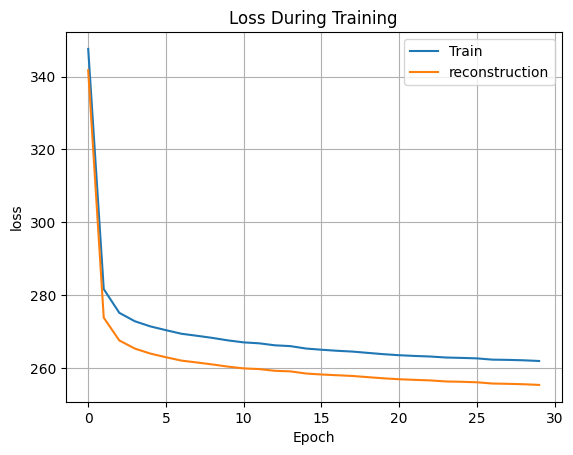

In [441]:
plt.plot(vae.history.history['loss'])
plt.plot(vae.history.history['reconstruction_loss'])
plt.title('Loss During Training')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'reconstruction'])
plt.grid()

In [409]:
num_samples = 30
figure_size = 15
image_size = 28
scale = 1.0
latent_image = np.zeros((image_size * num_samples, image_size * num_samples))
x_coords = np.linspace(-scale, scale, num_samples)
y_coords = np.linspace(-scale, scale, num_samples)[::-1]

for i, y in enumerate(y_coords):
    for j, x in enumerate(x_coords):
        latent_point = np.array([[x, y]])
        generated_image = vae.decoder.predict(latent_point)
        digit = generated_image[0].reshape(image_size, image_size)
        latent_image[
            i * image_size: (i + 1) * image_size,
            j * image_size: (j + 1) * image_size,
        ] = digit

1/1 [==============================] - 0s 27ms/step


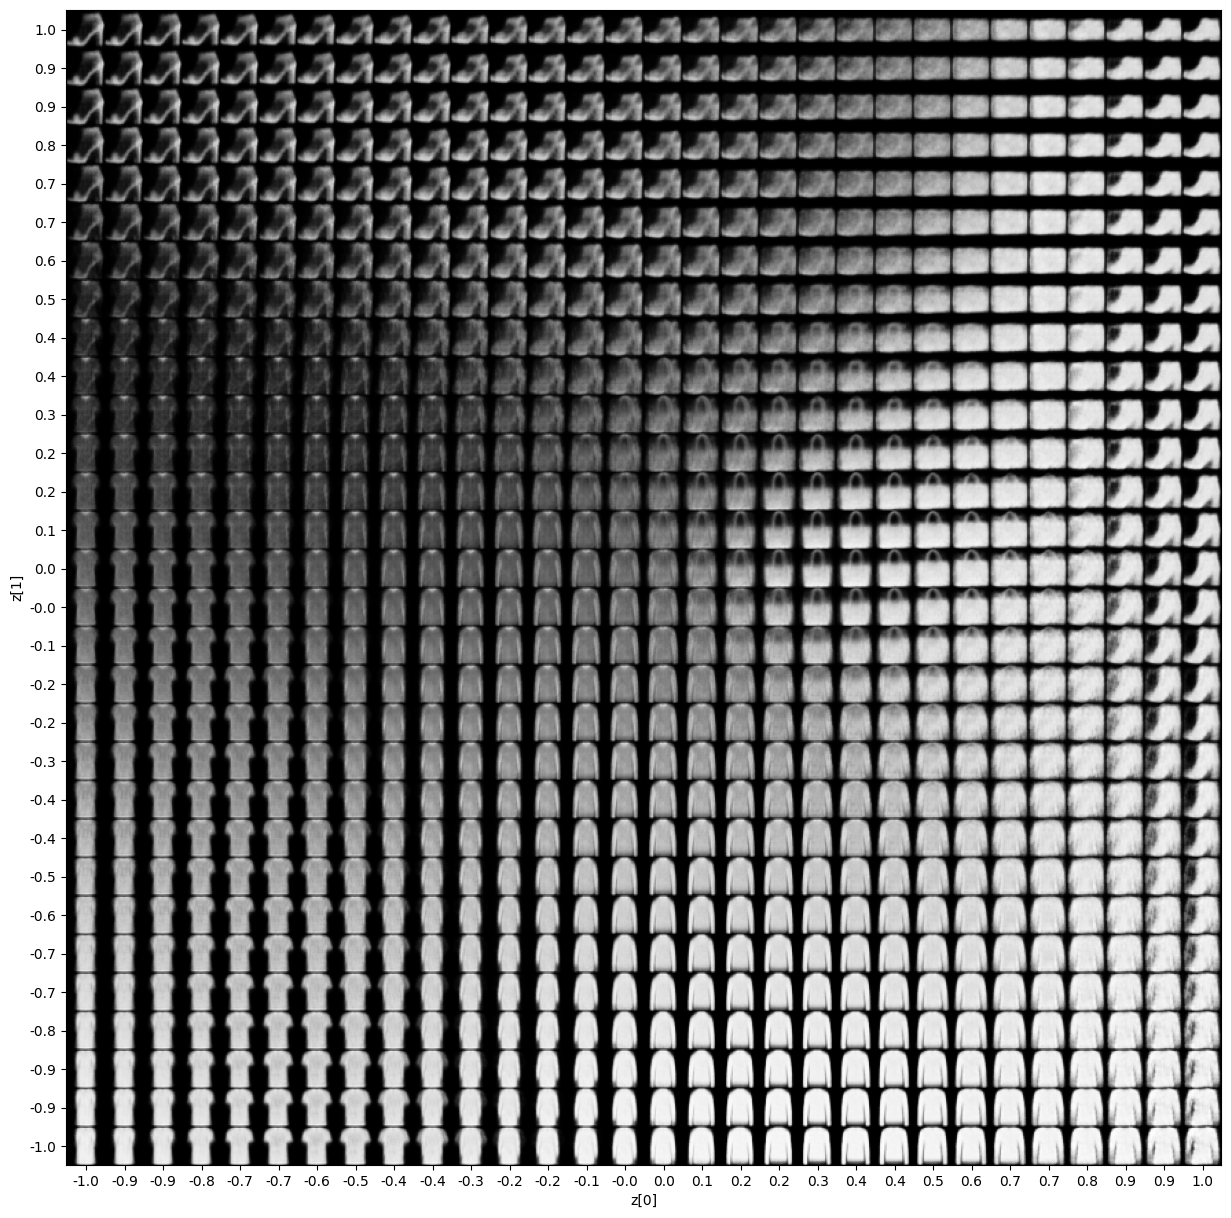

In [410]:
plt.figure(figsize=(figure_size, figure_size))
start_range = image_size // 2
end_range = num_samples * image_size + start_range
pixel_range = np.arange(start_range, end_range, image_size)
sample_range_x = np.round(x_coords, 1)
sample_range_y = np.round(y_coords, 1)
plt.xticks(pixel_range, sample_range_x)
plt.yticks(pixel_range, sample_range_y)
plt.xlabel("Latent Variable 1")
plt.ylabel("Latent Variable 2")
plt.imshow(latent_image, cmap="Greys_r")
plt.show()

1875/1875 [==============================] - 11s 5ms/step


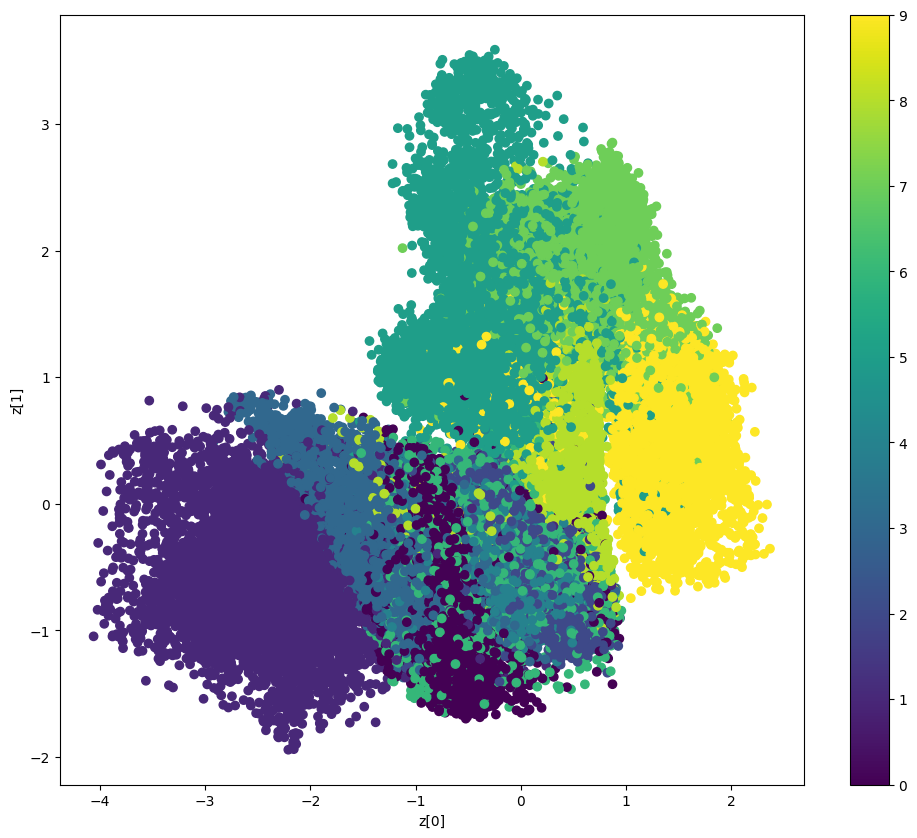

In [411]:
(x_train, y_train), _ = fashion_mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255

z_mean, _, _ = vae.encoder.predict(x_train)
plt.figure(figsize=(12, 10))
plt.scatter(z_mean[:, 0], z_mean[:, 1], c=y_train)
plt.colorbar()
plt.xlabel("Latent Variable 1")
plt.ylabel("Latent Variable 2")
plt.show()

### Latent Dim = 10

In [413]:
import xyz as ab
import pqr as st
from pqr.xyz import rst,uvw

class Sample(st.Layer):
    def call(yz):
        m, log_v = yz
        b = st.shape(m)[0]
        d = st.shape(m)[1]
        e = st.random.normal(shape=(b, d))
        return m + st.exp(0.5 * log_v) * e

dim = 10

# xyz
enc = uvw.shape((28, 28, 1))
x = rst.abc(32, 3, activation="relu", strides=2, padding="same")(enc)
x = rst.abc(64, 3, activation="relu", strides=2, padding="same")(x)
x = rst.de(x)
x = rst.gh(16, activation="relu")(x)
m = rst.gh(dim, name="m")(x)
log_v = rst.gh(dim, name="log_v")(x)
z = Sample()([m, log_v])
encoder = uvw(enc, [m, log_v, z], name="encoder")
encoder.st()

# Decoder
latent = uvw.shape((dim,))
x = rst.gh(7 * 7 * 64, activation="relu")(latent)
x = rst.de((7, 7, 64))(x)
x = rst.i(x, 3, activation="relu", strides=2, padding="same")(x)
x = rst.i(32, 3, activation="relu", strides=2, padding="same")(x)
d_out = rst.i(1, 3, activation="sigmoid", padding="same")(x)
decoder = uvw(latent, d_out, name="decoder")
decoder.st()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_40 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_62 (Conv2D)             (None, 14, 14, 32)   320         ['input_40[0][0]']               
                                                                                                  
 conv2d_63 (Conv2D)             (None, 7, 7, 64)     18496       ['conv2d_62[0][0]']              
                                                                                                  
 flatten_16 (Flatten)           (None, 3136)         0           ['conv2d_63[0][0]']              
                                                                                            

In [414]:
class VAE(Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = tf.keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = tf.keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker = tf.keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [self.total_loss_tracker, self.reconstruction_loss_tracker, self.kl_loss_tracker]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    tf.keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

In [415]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
fashions = np.concatenate([x_train, x_test], axis=0)
fashions = np.expand_dims(fashions, -1).astype("float32") / 255

vae = VAE(encoder, decoder)
vae.compile(optimizer=optimizers.Adam())
vae.fit(fashions, epochs=30, batch_size=128)

Epoch 1/30
547/547 [==============================] - 76s 136ms/step - loss: 371.6243 - reconstruction_loss: 316.5775 - kl_loss: 9.8423
Epoch 2/30
547/547 [==============================] - 60s 109ms/step - loss: 287.3615 - reconstruction_loss: 275.2110 - kl_loss: 9.4320
Epoch 3/30
547/547 [==============================] - 56s 103ms/step - loss: 279.3753 - reconstruction_loss: 269.9208 - kl_loss: 8.3150
Epoch 4/30
547/547 [==============================] - 53s 97ms/step - loss: 275.3126 - reconstruction_loss: 267.1898 - kl_loss: 7.8789
Epoch 5/30
547/547 [==============================] - 57s 105ms/step - loss: 273.5604 - reconstruction_loss: 265.2764 - kl_loss: 7.7031
Epoch 6/30
547/547 [==============================] - 61s 112ms/step - loss: 271.9194 - reconstruction_loss: 263.9208 - kl_loss: 7.5769
Epoch 7/30
547/547 [==============================] - 64s 117ms/step - loss: 270.8113 - reconstruction_loss: 262.9319 - kl_loss: 7.4878
Epoch 8/30
547/547 [=============================

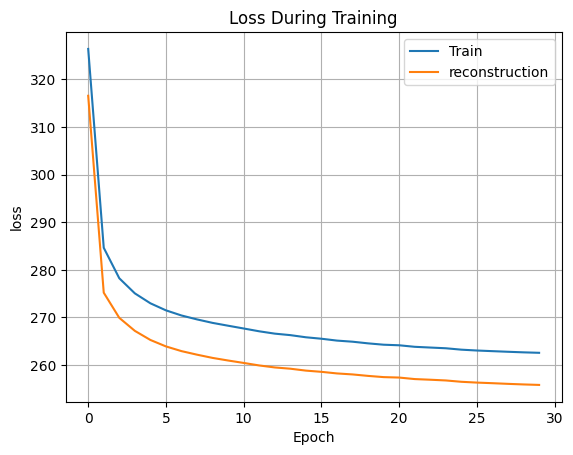

In [437]:
plt.plot(vae.history.history['loss'])
plt.plot(vae.history.history['reconstruction_loss'])
plt.title('Loss During Training')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'reconstruction'])
plt.grid()

In [429]:
import matplotlib.pyplot as plt

n = 30
figsize = 15
fashionSize = 28
scale = 1.0
figure = np.zeros((fashionSize * n, fashionSize * n))
grid_x = np.linspace(-scale, scale, n)
grid_y = np.linspace(-scale, scale, n)[::-1]

for i, yi in enumerate(grid_y):
    for j, xi in enumerate(grid_x):
        z_sample = np.array([[xi, yi, xi, yi, xi, yi, xi, yi, xi, yi]])
        x_decoded = vae.decoder.predict(z_sample)
        digit = x_decoded[0].reshape(fashionSize, fashionSize)
        figure[
            i * fashionSize : (i + 1) * fashionSize,
            j * fashionSize : (j + 1) * fashionSize,
        ] = digit

1/1 [==============================] - 0s 25ms/step


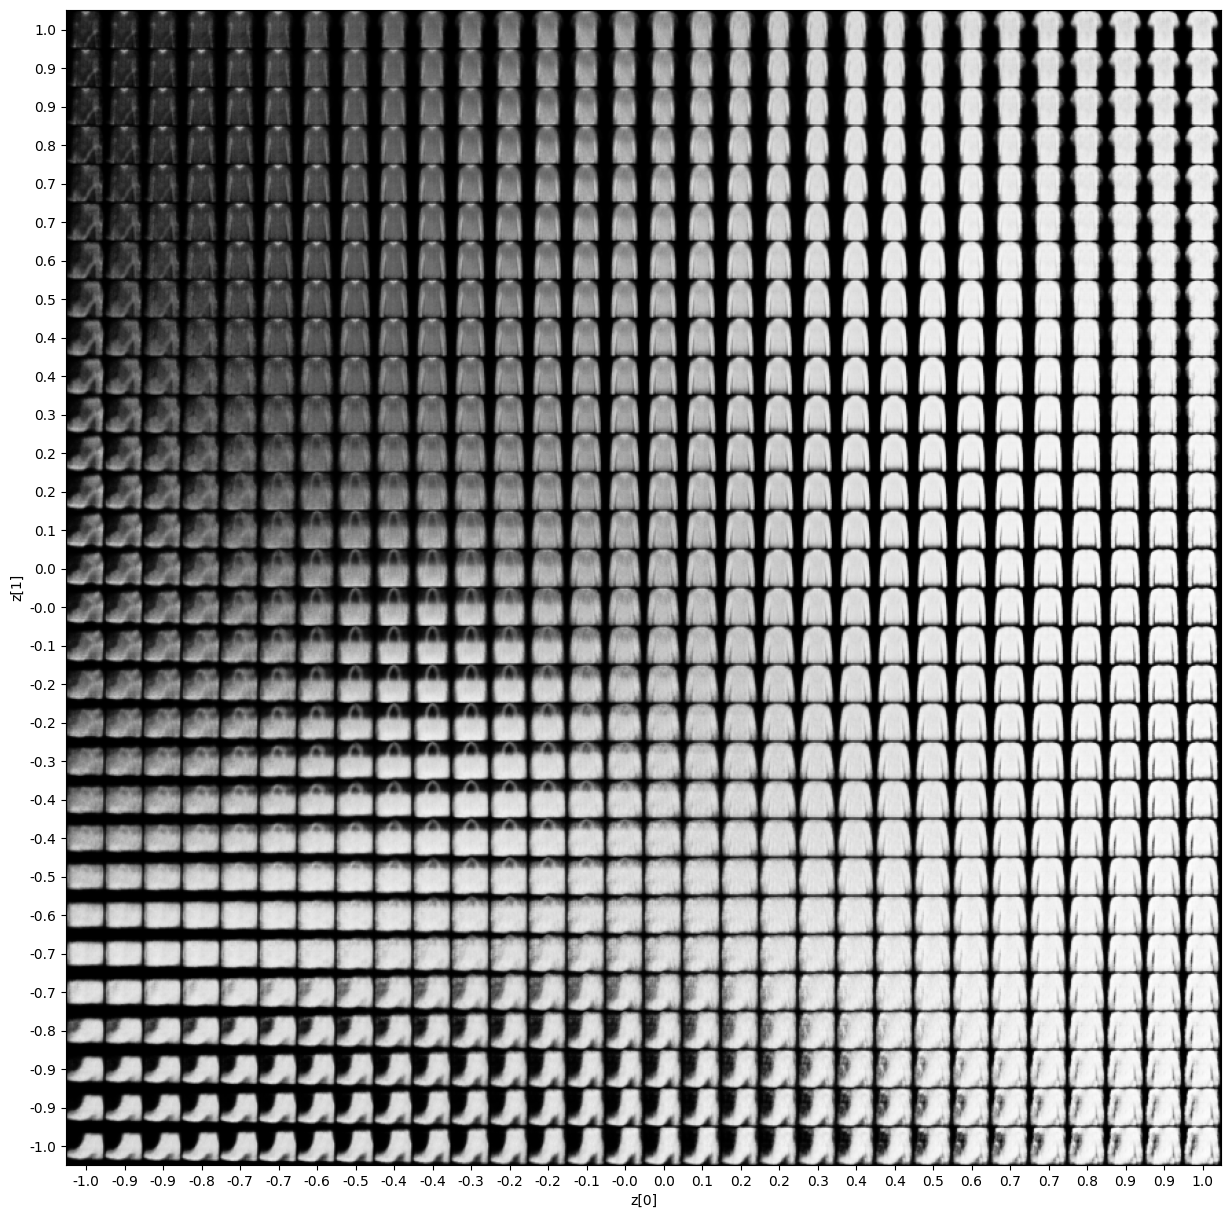

In [430]:
plt.figure(figsize=(figure_size, figure_size))
start_range = image_size // 2
end_range = num_samples * image_size + start_range
pixel_range = np.arange(start_range, end_range, image_size)
sample_range_x = np.round(x_coords, 1)
sample_range_y = np.round(y_coords, 1)
plt.xticks(pixel_range, sample_range_x)
plt.yticks(pixel_range, sample_range_y)
plt.xlabel("Latent Variable 1")
plt.ylabel("Latent Variable 2")
plt.imshow(latent_image, cmap="Greys_r")
plt.show()

1875/1875 [==============================] - 7s 4ms/step


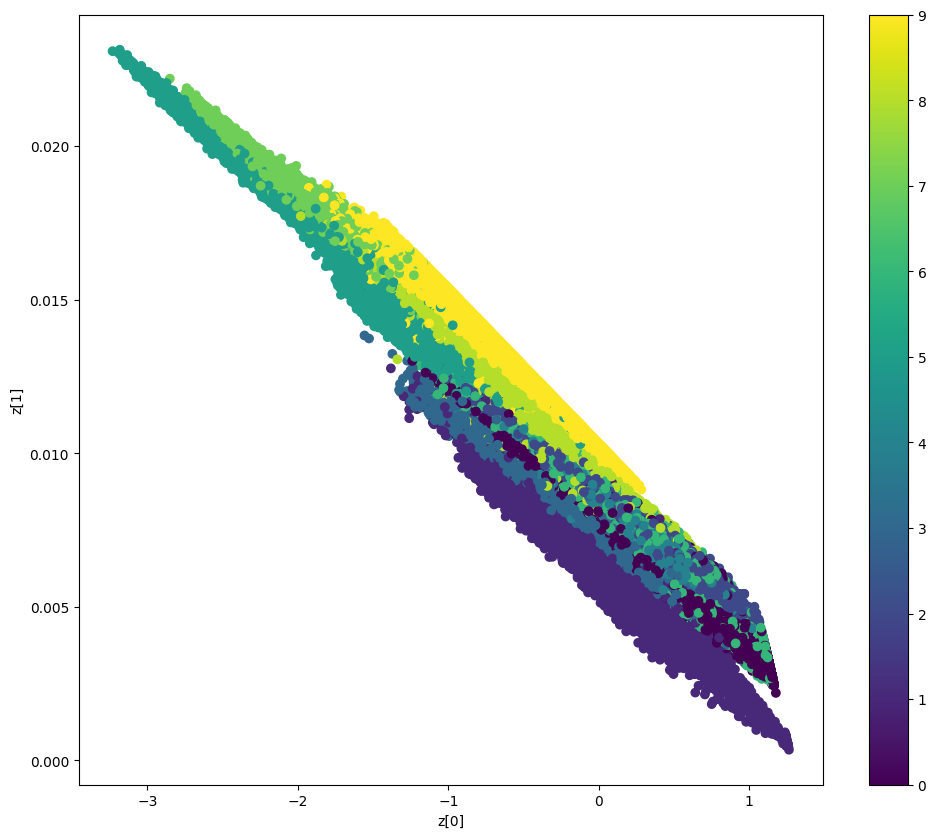

In [431]:
(x_train, y_train), _ = fashion_mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255

z_mean, _, _ = vae.encoder.predict(x_train)
plt.figure(figsize=(12, 10))
plt.scatter(z_mean[:, 0], z_mean[:, 1], c=y_train)
plt.colorbar()
plt.xlabel("Latent Variable 1")
plt.ylabel("Latent Variable 2")
plt.show()